In [2]:
import pandas as pd
URL = 'https://drive.google.com/file/d/1CuW60VUN1Q7dhcgk_6c_3G-SGQPKejAv/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
df = pd.read_csv(path)
df

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9163,2208502,SEPHORA COLLECTION,Face Masks,The Rose Gold Mask,no size,2.0,15,6200,6.0,6.0,...,True,limited edition · exclusive,no options,What it is: A limited-edition- nurturing and h...,Suggested Usage:-Unfold the mask.-Apply the ma...,-Rose Quartz Extract: Hydrates dry skin. Aqua...,0,1,1,0
9164,2298909,SEPHORA COLLECTION,Lip Sets,Give Me Some Sugar Colorful Gloss Balm Set,3 x 0.32 oz/ 9 g,0.0,0,266,15.0,27.0,...,True,exclusive,no options,What it is: A set of three bestselling Colorfu...,Suggested Usage:-Apply directly to lips using ...,Colorful Gloss Balm Wanderlust: Hydrogenated P...,0,1,0,0
9165,2236750,SEPHORA COLLECTION,Tinted Moisturizer,Weekend Warrior Tone Up Cream,0.946 oz/ 28 mL,0.0,0,445,16.0,16.0,...,True,exclusive,no options,What it is: A weightless complexion booster- i...,Suggested Usage:-Use this product as the last ...,Aqua (Water)- Dimethicone- Isohexadecane- Poly...,0,1,0,0
9166,50,SEPHORA COLLECTION,no category,Gift Card,no size,5.0,46,0,50.0,50.0,...,False,0,no options,What it is:- Available in denominations of $10...,no instructions,unknown,0,0,0,0


# Description

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   

# Data cleaning

In [4]:
df.isna().sum()

id                        0
brand                     0
category                  0
name                      0
size                      0
rating                    0
number_of_reviews         0
love                      0
price                     0
value_price               0
URL                       0
MarketingFlags            0
MarketingFlags_content    0
options                   0
details                   0
how_to_use                0
ingredients               0
online_only               0
exclusive                 0
limited_edition           0
limited_time_offer        0
dtype: int64

In [5]:
dub = df.duplicated()
print(" number of dublicate row= %d"% (dub.sum()))

 number of dublicate row= 0


# Feature Selection


In [6]:
df_cat=df.select_dtypes(include='object')
df_cat.head(5)

,brand,category,name,size,URL,MarketingFlags_content,options,details,how_to_use,ingredients
0,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,https://www.sephora.com/product/blu-mediterran...,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...
1,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,https://www.sephora.com/product/colonia-P16360...,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown
2,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,https://www.sephora.com/product/blu-mediterran...,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...
3,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,https://www.sephora.com/product/blu-mediterran...,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown
4,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,https://www.sephora.com/product/colonia-miniat...,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...


# Exploratory Data Analysis

In [7]:
describeNum = df.describe(include =['float64', 'int64', 'float', 'int'])
describeNum.T.style.background_gradient(cmap='magma',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
id,9168.000000,1962951.784795,385971.360901,50.000000,1819453.000000,2072353.500000,2230591.000000,2359685.000000
rating,9168.000000,3.990020,1.007707,0.000000,4.000000,4.000000,4.500000,5.000000
number_of_reviews,9168.000000,282.139180,890.642028,0.000000,10.000000,46.000000,210.000000,19000.000000
love,9168.000000,16278.585079,42606.514471,0.000000,1600.000000,4800.000000,13800.000000,1300000.000000
price,9168.000000,50.063237,47.164989,2.000000,24.000000,35.000000,59.000000,549.000000
value_price,9168.000000,51.823590,49.459020,2.000000,25.000000,35.000000,60.000000,549.000000
online_only,9168.000000,0.234839,0.423921,0.000000,0.000000,0.000000,0.000000,1.000000
exclusive,9168.000000,0.264725,0.441211,0.000000,0.000000,0.000000,1.000000,1.000000
limited_edition,9168.000000,0.091841,0.288817,0.000000,0.000000,0.000000,0.000000,1.000000
limited_time_offer,9168.000000,0.000327,0.018087,0.000000,0.000000,0.000000,0.000000,1.000000


In [8]:
describeNumCat = df.describe(include=["O"])
describeNumCat.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,unique,top,freq
brand,9168,324,SEPHORA COLLECTION,496
category,9168,143,Perfume,665
name,9168,9106,Blush,4
size,9168,1623,no size,3161
URL,9168,9168,https://www.sephora.com/product/blu-mediterraneo-minature-set-P443401?icid2=products grid:p443401,1
MarketingFlags_content,9168,10,0,4786
options,9168,564,no options,8377
details,9168,8839,no details,14
how_to_use,9168,6497,no instructions,1573
ingredients,9168,6962,unknown,1630


# Correlation heatmap


In [9]:
df.corr()

,id,rating,number_of_reviews,love,price,value_price,MarketingFlags,online_only,exclusive,limited_edition,limited_time_offer
id,1.000000,-0.176684,-0.175482,-0.104208,-0.026661,-0.004168,0.283722,0.153745,0.199285,0.200357,-0.008607
rating,-0.176684,1.000000,0.081478,0.094788,0.019559,0.001941,-0.108410,-0.123342,-0.001908,-0.130471,0.006164
number_of_reviews,-0.175482,0.081478,1.000000,0.746099,-0.084001,-0.088855,-0.096984,-0.137082,0.003799,-0.066661,0.000742
love,-0.104208,0.094788,0.746099,1.000000,-0.088724,-0.091140,-0.057228,-0.138933,0.050957,-0.046750,-0.002879
price,-0.026661,0.019559,-0.084001,-0.088724,1.000000,0.983357,-0.056920,0.117250,-0.178809,0.015333,-0.009679
value_price,-0.004168,0.001941,-0.088855,-0.091140,0.983357,1.000000,-0.028660,0.130658,-0.159005,0.079754,-0.009874
MarketingFlags,0.283722,-0.108410,-0.096984,-0.057228,-0.056920,-0.028660,1.000000,0.578973,0.627080,0.332344,0.018908
online_only,0.153745,-0.123342,-0.137082,-0.138933,0.117250,0.130658,0.578973,1.000000,-0.077543,0.097353,-0.010023
exclusive,0.199285,-0.001908,0.003799,0.050957,-0.178809,-0.159005,0.627080,-0.077543,1.000000,0.166162,0.002814
limited_edition,0.200357,-0.130471,-0.066661,-0.046750,0.015333,0.079754,0.332344,0.097353,0.166162,1.000000,0.015129


(9.5, -0.5)

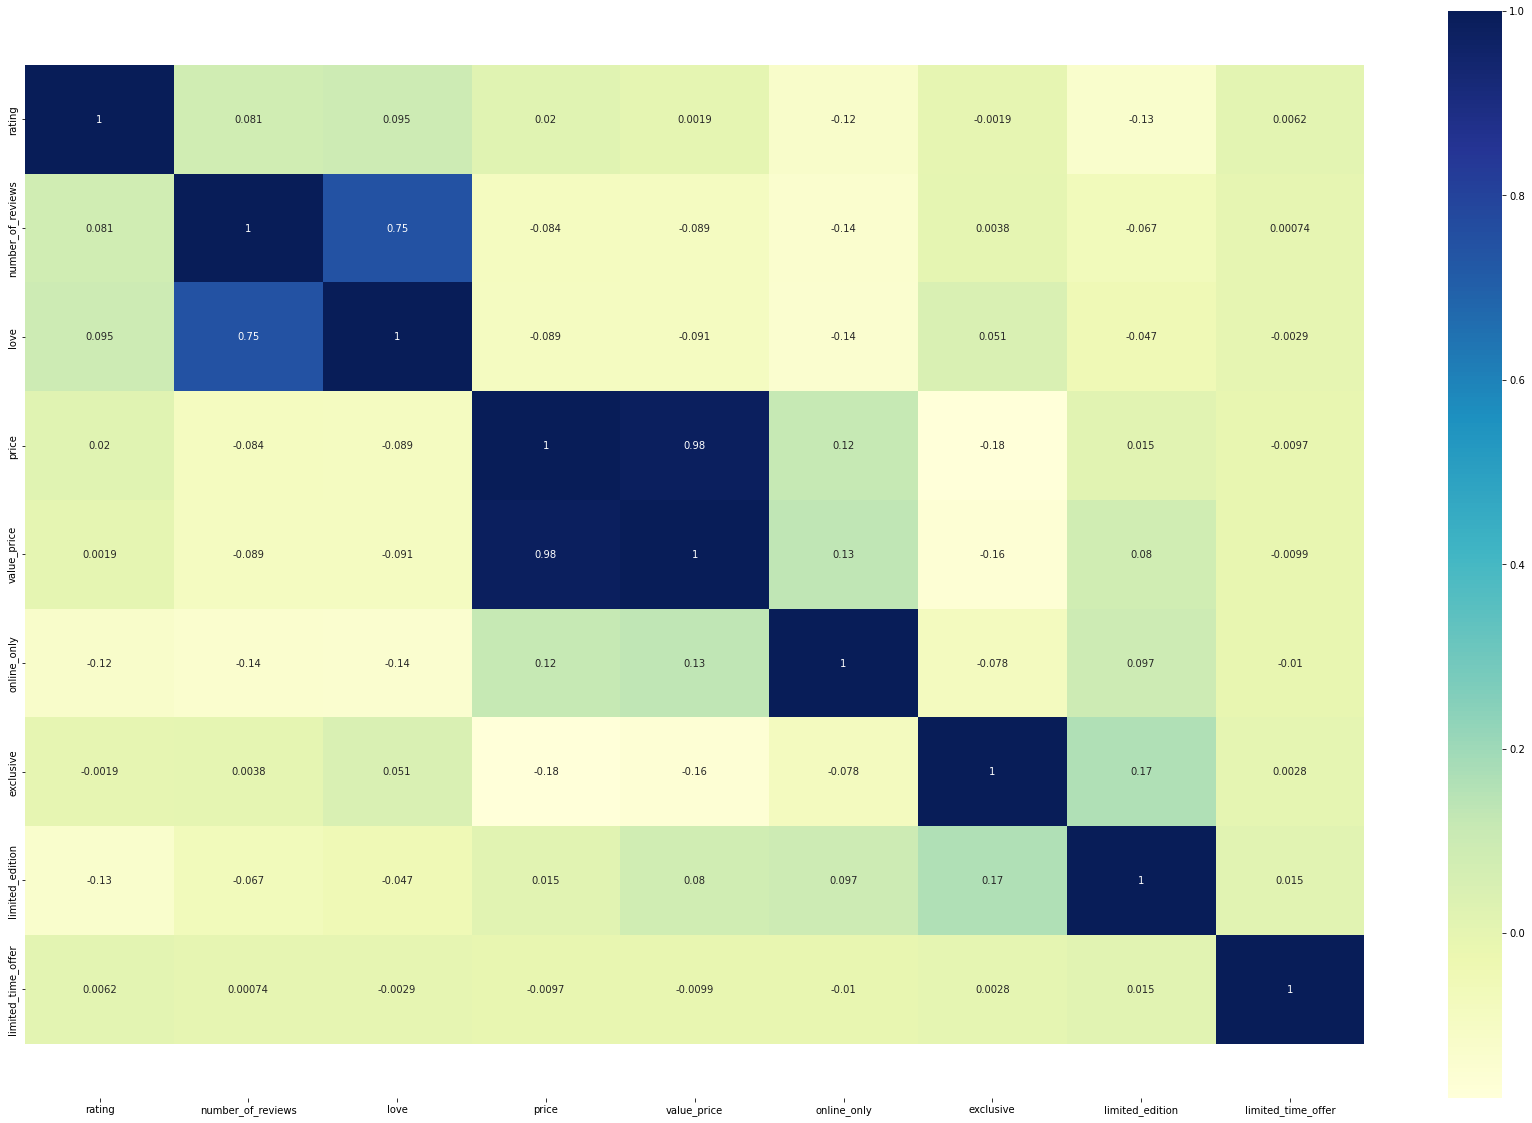

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt

features = ['rating', 'number_of_reviews', 'love', 'price', 'value_price', 'online_only', 'exclusive', 'limited_edition', 'limited_time_offer']

plt.figure(figsize=(30,20))
ax = sns.heatmap(data = df[features].corr(),cmap='YlGnBu',annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

# Scatter plot

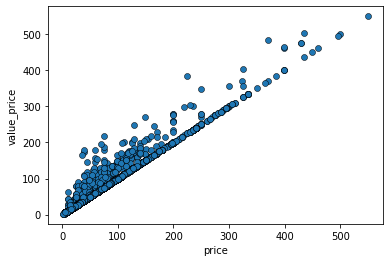

In [11]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['price'], y=df['value_price'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="price", ylabel="value_price")

# What Most Popular Product Based on Rating


In [12]:
rating_products = pd.DataFrame(round(df.groupby('brand')['rating'].mean(),2))
most_rating = rating_products.sort_values('rating', ascending=False)
most_rating.head(5)

,rating
brand,
Four Sigmatic,5.00
Fable & Mane,5.00
Aether Beauty,5.00
Montblanc,5.00
Golde,4.88


<AxesSubplot:xlabel='exclusive', ylabel='brand'>

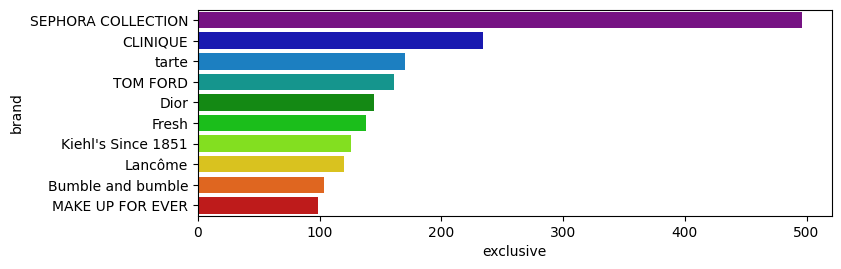

In [13]:
brandbig10 = df.groupby(['brand'])['exclusive'].count().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(18,6), dpi=100)
plt.subplot(2,2,1)
plt.ylabel('')
plt.xlabel('')
sns.barplot(y=brandbig10['brand'],x=brandbig10['exclusive'], palette='nipy_spectral')

# Feature Engineering

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   

In [15]:
df['MarketingFlags'] = df.MarketingFlags.map({False:0, True:1})

In [16]:
df = df.drop(['id'],axis=1)
df = df.drop(['name'],axis=1)
df = df.drop(['URL'],axis=1)
df = df.drop(['options'],axis=1)
df = df.drop(['details'],axis=1)
df = df.drop(['how_to_use'],axis=1)
df = df.drop(['ingredients'],axis=1)
df = df.drop(['price'],axis=1)

In [17]:
df.head(5)

,brand,category,size,rating,number_of_reviews,love,value_price,MarketingFlags,MarketingFlags_content,online_only,exclusive,limited_edition,limited_time_offer
0,Acqua Di Parma,Fragrance,5 x 0.16oz/5mL,4.0,4,3002,75.0,1,online only,1,0,0,0
1,Acqua Di Parma,Cologne,0.7 oz/ 20 mL,4.5,76,2700,66.0,1,online only,1,0,0,0
2,Acqua Di Parma,Perfume,5 oz/ 148 mL,4.5,26,2600,180.0,1,online only,1,0,0,0
3,Acqua Di Parma,Perfume,2.5 oz/ 74 mL,4.5,23,2900,120.0,1,online only,1,0,0,0
4,Acqua Di Parma,Fragrance,5 x 0.16oz/5mL,3.5,2,943,80.0,1,online only,1,0,0,0


# Feature encoding 

In [18]:
 df['rating']=df['rating'].astype(str)

In [19]:
cat_cols = df.select_dtypes("object").columns
drop_categ = []
for i in cat_cols:
    drop_categ += [ i+'_'+str(df[i].unique()[-1]) ]
df = pd.get_dummies(df, columns=cat_cols) 

df.drop(drop_categ, axis=1, inplace=True)

# Modeling

In [20]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [21]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
X = df.drop('value_price', axis = 1) 
y = df['value_price']

In [22]:
Lr.fit(X,y)

LinearRegression()

In [23]:
ypred=Lr.predict(X)
ypred

array([ 78.41090983,  92.6528753 , 165.83410025, ...,  15.99998093,
        27.11336493,  27.40572345])

In [24]:
c=Lr.coef_
c

array([-7.11929737e-04,  3.69217807e-05,  7.36386314e+08, ...,
       -2.84561256e+08, -2.52603297e+08, -2.19838891e+08])

In [25]:
i=Lr.intercept_
i

-448620142.34459674

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Standardization

In [27]:
scaler = RobustScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:

print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (7334, 2112)
Shape of the y Train : (7334,)
Shape of the X test : (1834, 2112)
Shape of the y test : (1834,)


# Ridge Regression



In [29]:
import numpy as np
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred= ridge.predict(X_test)

print("Accuracy on Traing set   : ",ridge.score(X_train,y_train))
print("Accuracy on Testing set  : ",ridge.score(X_test,y_test))
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R_score          : ', metrics.r2_score(y_test, y_pred))

Accuracy on Traing set   :  0.6794752953969834
Accuracy on Testing set  :  0.6170442754183301
Mean Absolute Error      :  17.375763971719145
Mean Squared  Error      :  906.7626778875547
Root Mean Squared Error  :  30.112500359278613
R_score          :  0.6170442754183301


# Polynomial

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

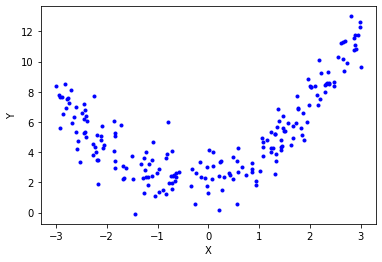

In [2]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.9 * X**2 + 0.7*X + 2 + np.random.randn(200, 1)

plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [4]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

0.15691604088966382


In [5]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.9028987697425048


In [6]:
print(lr.coef_)
print(lr.intercept_)

[[0.72906161 0.825725  ]]
[2.40124911]


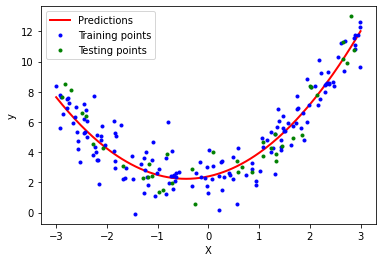

[[0.72906161 0.825725  ]]
[2.40124911]


In [7]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
print(lr.coef_)
print (lr.intercept_)